In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [3]:
data = pd.read_csv('survey_final.csv',low_memory=False)

In [4]:
data.describe(include='all')

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
count,303591.000000,303546,1.511720e+05,302658,200167,216942,258928,289916,297748,225834,248070,257052,226578,248486,239473
unique,NaN,5,NaN,247,15642,11958,29323,23,8,20,73293,66267,13,33,84
top,NaN,Yes,NaN,United States,MySQL,MySQL,"Developer, full-stack","Bachelor‚'s degree (BA, BS, B.Eng., etc.)",Employed full-time,Slightly satisfied,Python,Java,20 to 99 employees,"Computer science, computer engineering, or sof...",0-2 years
freq,NaN,201542,NaN,65182,12150,17360,12857,43658,216353,48149,3825,3083,50379,129132,23421
mean,2018.548149,NaN,1.058168e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.005437,NaN,2.347656e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2018.000000,NaN,2.497200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019.000000,NaN,5.499600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,9.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Make all data field consistent betweem years
data['EdLevel'].replace({"Master's degree (M.A., M.S., M.Eng., MBA, etc.)":"Master's degree",
                          "Bachelor's degree (B.A., B.S., B.Eng., etc.)":"Bachelor's degree",
                          "Secondary school": "Secondary school",
                          "Professional degree (JD, MD, etc.)":"Professional degree",
                          "Some college/university study without earning a degree":"Some college/university study without earning a bachelor's degree",
                          "Associate degree (A.A., A.S., etc.)":"Associate degree", 
                          "Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctoral degree",
                          "Bachelor's degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
                          "Master's degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                          "Other doctoral degree (Ph.D, Ed.D., etc.)":"Doctoral degree",
                          "Bachelor‚'s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
                          "Master‚'s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                          "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school", 
                          " ":"I prefer not to answer",
                          "Full-stack developer":"I prefer not to answer" }, inplace=True)

data['OrgSize'].replace({'2-9 employees' : '2 to 9 employees',
                        'Fewer than 10 employees': '2 to 9 employees'}, inplace = True)

data['UndergradMajor'].replace({"Computer science, computer engineering, or software engineering":"Computer science",
                                "Another engineering discipline (such as civil, electrical, mechanical, etc.)":"Another engineering discipline",
                                "A humanities discipline (such as literature, history, philosophy, etc.)":"Humanities",
                                "A health science (such as nursing, pharmacy, radiology, etc.)":"Health science",
                                "Information systems, information technology, or system administration":"Information systems",
                                "A natural science (such as biology, chemistry, physics, etc.)":"Natural science",
                                "Fine arts or performing arts (such as graphic design, music, studio art, etc.)":"Fine arts or performing arts",
                                "A social science (such as anthropology, psychology, political science, etc.)":"Social science",
                                "A business discipline (such as accounting, finance, marketing, etc.)":"Business",
                                "Another engineering discipline (ex. civil, electrical, mechanical)":"Another engineering discipline",
                                "A business discipline (ex. accounting, finance, marketing)":"Business",
                                "A natural science (ex. biology, chemistry, physics)":"Natural science",
                                "A social science (ex. anthropology, psychology, political science)":"Social science",
                                "A humanities discipline (ex. literature, history, philosophy)":"Humanities",
                                "Fine arts or performing arts (ex. graphic design, music, studio art)":"Fine arts or performing arts",
                                "A health science (ex. nursing, pharmacy, radiology)":"Health science",
                                "Computer science or software engineering":"Computer science",
                                "A non-computer-focused engineering discipline":"Another engineering discipline",
                                "A social science":"Social science","A natural science":"Natural science",
                                "A business discipline":"Business","Information technology, networking, or system administration":"Information systems","Fine arts or performing arts":"Fine arts or performing arts","Management information systems":"Information systems","A humanities discipline":"Humanities","Psychology":"Social science","A health science":"Health science"}, inplace=True)

def jobsat(x):
    if (x == 'Extremely satisfied') | (x == 10):
        return 9
    elif x == 'Very satisfied':
        return 8
    elif x == 'Moderately satisfied':
        return 7
    elif x == 'Slightly satisfied':
        return 6
    elif x == 'Neither satisfied nor dissatisfied':
        return 5
    elif x == 'Slightly dissatisfied':
        return 4
    elif x == 'Moderately dissatisfied':
        return 3
    elif x == 'Very dissatisfied':
        return 2
    elif (x == 'Extremely dissatisfied') | (x == 0):
        return 1
    else:
        return x

data['JobSat'] = data['JobSat'].apply(jobsat)   


def yearcodeconvert(x):
    if type(x) == str:
        a = re.findall('[0-9]+', x)
        if len(a) == 2:
            return int(a[1])
        if int(a[0]) >=30:
            return 30
        else:
            return int(x)
    else:
        return x
data['YearsCodePro'].replace({'Less than 1 year':1,
                              'Less than a year':1,
                              '20 or more years':20,
                              '30 or more years':30,
                              'More than 50 years':30}, inplace = True)
                             
data['YearsCodePro'] = data['YearsCodePro'].apply(yearcodeconvert)

In [6]:
# save data of each year for processing
data_2017 = data[data['Year']==2017]
data_2018 = data[data['Year']==2018]
data_2019 = data[data['Year']==2019]
data_2020 = data[data['Year']==2020]

## DevType separation

### 2017

In [7]:
mask = data_2017['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2017[mask].copy()
# remove all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2017 = df['DevType'].str.get_dummies(sep='; ')
# as 2017 have different choice from 18,19 and 20, we will merge the choices to align it with the rest
split_2017['Data scientist or machine learning specialist'] = split_2017['Data scientist'] | split_2017['Machine learning specialist']
# Get the desired columns
select_type_2017 = ['Data scientist or machine learning specialist',
                   'Database administrator']
candidate_2017 = (np.sum(split_2017.loc[:,select_type_2017],axis = 1) != 0).index

In [8]:
split_2017.head()

,Data scientist,Database administrator,Desktop applications developer,DevOps specialist,Developer with a statistics or mathematics background,Embedded applications/devices developer,Graphic designer,Graphics programming,Machine learning specialist,Mobile developer,Other,Quality assurance engineer,Systems administrator,Web developer,Data scientist or machine learning specialist
252218,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
252234,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
252237,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
252240,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
252262,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1


### 2018

In [9]:
mask = data_2018['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2018[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2018 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2018 = ['Data or business analyst',
                    'Data scientist or machine learning specialist',
                    'Database administrator']
candidate_2018 = (np.sum(split_2018.loc[:,select_type_2018],axis = 1) != 0).index

### 2019

In [10]:
mask = data_2019['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2019[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #front
# Split the text by semi colon
split_2019 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2019 = ['Data or business analyst',
               'Data scientist or machine learning specialist',
               'Database administrator',
               'Engineer, data']
candidate_2019 = (np.sum(split_2019.loc[:,select_type_2019],axis = 1) != 0).index

### 2020

In [11]:
mask = data_2020['DevType'].str.contains(r'data|machine|business', case = False,na=False)
df = data_2020[mask].copy()
# Replace all space at beginning of the text
df['DevType'].replace('^\s+', '', regex=True, inplace=True) #begin of the txt
# Split the text by semi colon
split_2020 = df['DevType'].str.get_dummies(sep=';')
# Get the desired columns
select_type_2020 = ['Data or business analyst',
                   'Data scientist or machine learning specialist',
                   'Database administrator',
                   'Engineer, data']
candidate_2020 = (np.sum(split_2020.loc[:,select_type_2020],axis = 1) != 0).index

- Now, we merge all the splitted columns of `DevType` together. And from now, we will just use the data of the developers having the data related job 
- Then we will also convert features that contain list of values in to dummies variable: `DatabaseDesireNextYear`, `DatabaseWorkedWith`, `LanguageDesireNextYear` and `LanguageWorkedWith`.

In [12]:
# Concat all dummies of 4 year
dm_dev_type = pd.concat([split_2017[select_type_2017],
                                 split_2018[select_type_2018],
                                 split_2019[select_type_2019],
                                 split_2020[select_type_2020]],axis = 0)
# we only consider these job type in the data
data = data.loc[dm_dev_type.index,:]
# Function to convert 
def dummies_converter(df, col):
    # remove space at the begining of the text
    df[col].replace('^\s+', '', regex=True, inplace=True) #begin of the txt
    # Split the text by semi colon
    dm1 = df[df['Year'] == 2017][col].str.get_dummies(sep='; ')
    dm2 = df[df['Year'] >= 2018][col].str.get_dummies(sep=';')
    return pd.concat([dm1,dm2],axis = 0)
# Feature to get dummies:
feat_for_dm = ['DatabaseDesireNextYear', 'DatabaseWorkedWith', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'DevType']
# Convert to dummies
dm_db_nextyear = dummies_converter(data,'DatabaseDesireNextYear')
dm_db_work = dummies_converter(data,'DatabaseWorkedWith')
dm_language_nextyear = dummies_converter(data,'LanguageDesireNextYear')
dm_language_work = dummies_converter(data,'LanguageWorkedWith')
# Drop converted features
data = data.drop(feat_for_dm,axis = 1,errors='ignore')

**Now we have 5 data frames of dummies features**
- dm_dev_type
- dm_db_nextyear
- dm_db_work
- dm_language_nextyear
- dm_language_work

In [13]:
#data = pd.merge(data, dev_type, left_index=True, right_index=True)
dm_dev_type.head()

,Data scientist or machine learning specialist,Database administrator,Data or business analyst,"Engineer, data"
252218,1,0,NaN,NaN
252234,1,0,NaN,NaN
252237,0,1,NaN,NaN
252240,0,1,NaN,NaN
252262,1,1,NaN,NaN


In [14]:
df = data.copy()
#df = pd.merge(df, dm_dev_type, left_index= True, right_index= True)
#df['LogEarnings'] = np.log10(df['ConvertedComp']+1)

In [15]:
df.describe()

,Year,ConvertedComp,YearsCodePro
count,61562.000000,3.609000e+04,56310.000000
mean,2018.593142,1.113321e+05,8.692524
std,0.942615,2.517584e+05,7.312943
min,2017.000000,0.000000e+00,1.000000
25%,2018.000000,2.512875e+04,3.000000
50%,2019.000000,5.507500e+04,6.000000
75%,2019.000000,9.500000e+04,12.000000
max,2020.000000,2.000000e+06,30.000000


**The target varialbe of this analyis this annual salary - `ConvertedComp`, lets take a look into that feature first**

In [16]:
df.isna().sum()

Year                  0
Hobbyist              0
ConvertedComp     25472
Country               0
EdLevel            1074
Employment          283
JobSat             8798
OrgSize           10581
UndergradMajor     7488
YearsCodePro       5252
dtype: int64

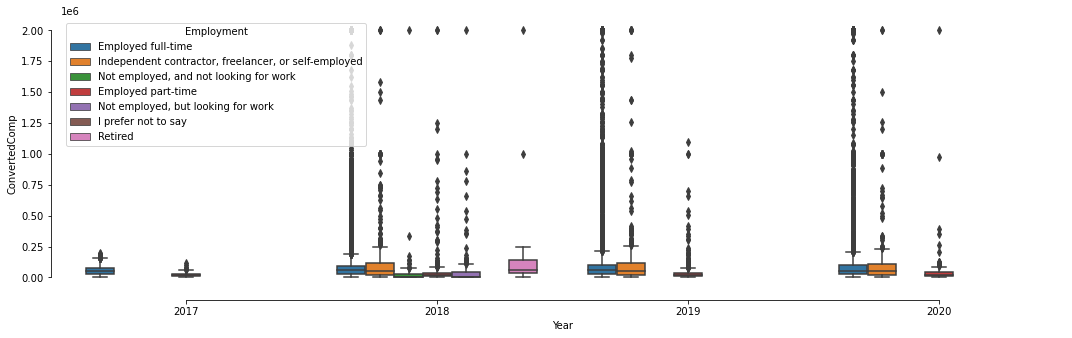

In [17]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

To make this analysis as practical as possible, we will only consider people who was having a job related to data, so we will exclude people who does not have a salary information and job of not employed, no information on job or retired.

In [18]:
# Drop irrelevant job title
df = df.loc[~df['Employment'].isin(['Not employed, and not looking for work',
                                    'Not employed, but looking for work',
                                    'I prefer not to say', 'Retired']), :]
# Drop people do not have information about salary
df = df.loc[~df["ConvertedComp"].isna(),:]

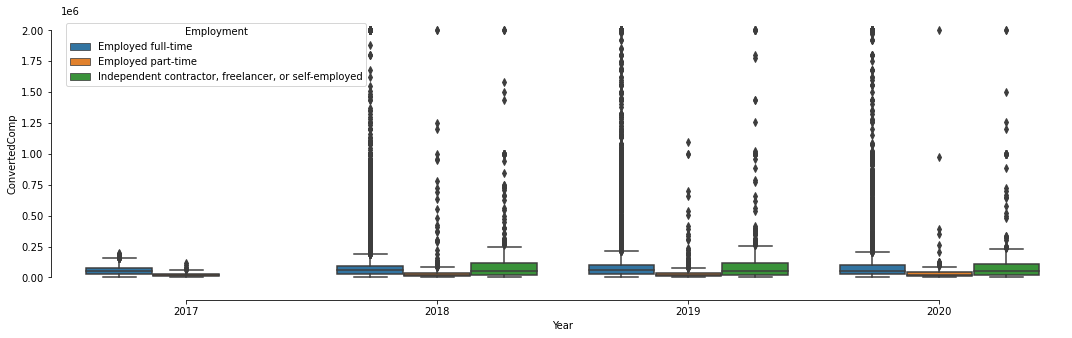

In [19]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

From the box-plot, we can observe that there is a lot of outliers in the annual salary, for relevancy of this analysis, we will exclude people ving annual salary more than 300,000$

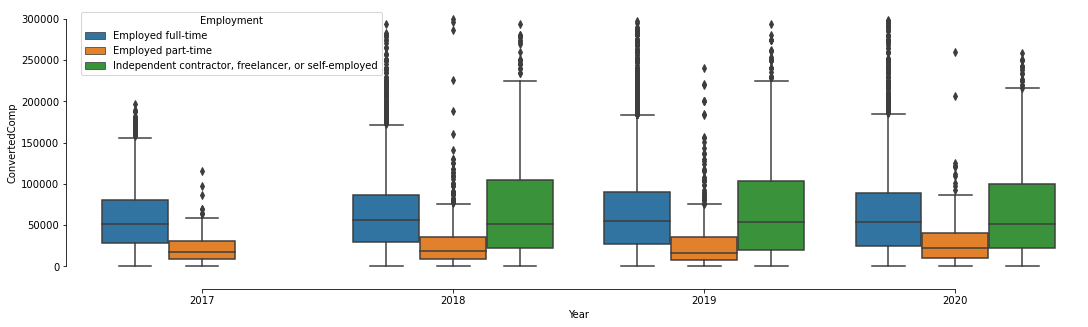

In [20]:
# Remove outlier
df = df.loc[(df['ConvertedComp'] < 300000) & (df['ConvertedComp'] > 0),:]
# plot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

In [21]:
#percentage of data kept after removing outliers and considering only instances that have our target variable
len(df)/len(data)*100

54.58074786394205

## Missing values treatment

In [22]:
#This is the number of missing values still existing (without dummies)
df.isna().sum()

Year                 0
Hobbyist             0
ConvertedComp        0
Country              0
EdLevel            463
Employment          40
JobSat              75
OrgSize           1697
UndergradMajor    3086
YearsCodePro        83
dtype: int64

In [22]:
#will give the index of the rows with any missing value
nans_index = df.isna().any(axis=1)
df[nans_index]

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro
252617,2017,"Yes, both",40000.00000,Germany,Secondary school,Employed full-time,6.0,20 to 99 employees,NaN,4.0
252719,2017,"Yes, I program as a hobby",20493.82716,Poland,Secondary school,Employed part-time,9.0,2 to 9 employees,NaN,1.0
253076,2017,"Yes, I program as a hobby",27272.72727,Canada,Secondary school,Employed full-time,3.0,20 to 99 employees,NaN,2.0
253346,2017,"Yes, both",88000.00000,United States,Secondary school,Employed full-time,5.0,100 to 499 employees,NaN,11.0
253395,2017,"Yes, I program as a hobby",110000.00000,United States,Bachelor's degree,Employed full-time,9.0,2 to 9 employees,Computer science,NaN
...,...,...,...,...,...,...,...,...,...,...
63051,2020,Yes,5868.00000,India,NaN,Employed full-time,8,"10,000 or more employees",Computer science,6.0
63383,2020,No,13620.00000,Argentina,Secondary school,Employed full-time,5,20 to 99 employees,NaN,7.0
63542,2020,Yes,2640.00000,Sri Lanka,NaN,Employed full-time,2,10 to 19 employees,Computer science,1.0
63941,2020,Yes,38375.00000,Spain,I never completed any formal education,Employed full-time,6,"1,000 to 4,999 employees",NaN,7.0


In [23]:
#if we would remove all the rowa with still missing values that would mean loosing 14,5% of data
len(df[nans_index])/len(df)*100

14.597779827981311

In [24]:
print(df.dtypes)

Year                int64
Hobbyist           object
ConvertedComp     float64
Country            object
EdLevel            object
Employment         object
JobSat             object
OrgSize            object
UndergradMajor     object
YearsCodePro      float64
dtype: object


In [25]:
#let's transform to float
df['JobSat']=df['JobSat'].astype(float)

In [26]:
# Creating new df copy to explore missing values imputation
df_na = df.copy()

In [27]:
# KNNImputer 
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# to fill the missing values 
related_variables_yearscodepro = (['YearsCodePro'])
related_variables_jobsat = (['JobSat'])

In [28]:
df_na[related_variables_yearscodepro] = imputer.fit_transform(df_na[related_variables_yearscodepro])
df_na[related_variables_jobsat] = imputer.fit_transform(df_na[related_variables_jobsat])

In [29]:
df_na["YearsCodePro"].unique()

array([ 2.        ,  3.        ,  4.        , 15.        ,  5.        ,
       10.        ,  9.        ,  1.        , 16.        ,  7.        ,
       20.        , 18.        , 17.        , 11.        ,  6.        ,
       14.        ,  8.        , 19.        ,  8.75571335, 13.        ,
       12.        , 23.        , 26.        , 30.        , 29.        ,
       22.        , 25.        , 21.        , 24.        , 27.        ,
       28.        ])

In [30]:
df_na["YearsCodePro"]=df_na["YearsCodePro"].round(decimals=0)

In [31]:
df_na["YearsCodePro"].unique()

array([ 2.,  3.,  4., 15.,  5., 10.,  9.,  1., 16.,  7., 20., 18., 17.,
       11.,  6., 14.,  8., 19., 13., 12., 23., 26., 30., 29., 22., 25.,
       21., 24., 27., 28.])

In [32]:
df_na["JobSat"].unique()

array([ 4.        , 10.        ,  6.        ,  5.        ,  7.        ,
        8.        ,  1.        ,  3.        ,  9.        ,  2.        ,
        6.12426177,  0.        ])

In [33]:
df_na["JobSat"]=df_na["JobSat"].round(decimals=0)

In [34]:
df_na["JobSat"].unique()

array([ 4., 10.,  6.,  5.,  7.,  8.,  1.,  3.,  9.,  2.,  0.])

In [35]:
#apply the imputation to the database
df=df_na.copy()

In [36]:
df['EdLevel'].value_counts().head(10) 

Bachelor's degree                                                    14140
Master's degree                                                       9020
Some college/university study without earning a bachelor's degree     4459
Doctoral degree                                                       1863
Secondary school                                                      1792
Associate degree                                                      1012
Professional degree                                                    501
Primary/elementary school                                              201
I never completed any formal education                                 140
I prefer not to answer                                                  10
Name: EdLevel, dtype: int64

In [37]:
#since there is the option of "i prefer not to answer" we think that this is the logical value to fill the missing values in thos variable
df['EdLevel'].fillna(value="I prefer not to answer ", inplace=True)

In [38]:
df['Employment'].value_counts().head(10) 

Employed full-time                                      28673
Independent contractor, freelancer, or self-employed     3387
Employed part-time                                       1501
Name: Employment, dtype: int64

In [39]:
#since there is clearly a most frequent value we will use the mode to subtitute the missing values
df['Employment'].fillna(df['Employment'].mode()[0], inplace=True)

In [40]:
df['OrgSize'].value_counts().head(10) 

20 to 99 employees                                    6861
100 to 499 employees                                  5332
10,000 or more employees                              4360
2 to 9 employees                                      4087
10 to 19 employees                                    3538
1,000 to 4,999 employees                              3331
500 to 999 employees                                  1889
5,000 to 9,999 employees                              1408
Just me - I am a freelancer, sole proprietor, etc.    1063
I don't know                                            26
Name: OrgSize, dtype: int64

In [41]:
#since there is an option for 'i don't know' we will use it to fill the missing values
df['OrgSize'].fillna(value="I don't know", inplace=True)

In [42]:
df['UndergradMajor'].value_counts().head(10) 

Computer science                  17015
Another engineering discipline     2746
Information systems                2397
Natural science                    2071
Mathematics or statistics          1962
Business                           1012
Social science                      806
Web development or web design       705
Humanities                          624
Fine arts or performing arts        338
Name: UndergradMajor, dtype: int64

In [43]:
#there is clearly a most frequent value in this variable so we will use the mode to substitute the missing values
df['UndergradMajor'].fillna(df['UndergradMajor'].mode()[0], inplace=True)

In [44]:
# to verify the final number of missing values 
df.isna().sum()

Year              0
Hobbyist          0
ConvertedComp     0
Country           0
EdLevel           0
Employment        0
JobSat            0
OrgSize           0
UndergradMajor    0
YearsCodePro      0
dtype: int64

In [45]:
#the nan values in the dummies will be substituted by zero, we just must have in consideration that for example the databases in 2017 don't include all the options that exist in the other years
#in the same way in devtype the options of data/ business analyst and data engineer in 2017 qre not existing
dm_db_nextyear.fillna(value=0, inplace=True)
dm_dev_type.fillna(value=0, inplace=True)
dm_db_work.fillna(value=0, inplace=True)
dm_language_nextyear.fillna(value=0, inplace=True)
dm_language_work.fillna(value=0, inplace=True)

In [46]:
df_all = pd.concat([df, dm_dev_type, dm_db_nextyear, dm_db_work, dm_language_nextyear, dm_language_work],
                   axis=1, join='inner')
# export the data
filename = 'stack.csv'
df_all.to_csv(filename, index=False)
# df
df_all.head()

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,...,Bash/Shell/PowerShell,CSS,Cobol,Delphi/Object Pascal,HTML,HTML/CSS,Kotlin,Ocaml,Other(s):,WebAssembly
252342,2017,"Yes, both",43750.00000,United Kingdom,Bachelor's degree,Employed full-time,4.0,2 to 9 employees,Computer science,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252345,2017,"Yes, I program as a hobby",51282.05128,Denmark,Some college/university study without earning ...,Employed part-time,10.0,100 to 499 employees,Computer science,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252361,2017,No,25000.00000,Israel,Some college/university study without earning ...,Employed full-time,6.0,"5,000 to 9,999 employees",Computer science,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252368,2017,"Yes, I program as a hobby",100000.00000,United States,Some college/university study without earning ...,Employed full-time,5.0,20 to 99 employees,Computer science,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252372,2017,"Yes, both",27000.00000,Ukraine,Master's degree,Employed full-time,7.0,100 to 499 employees,Computer science,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#final number of missing values
df_all.isna().sum().sum()

0

## 1. What is the impact of education major on salary

In [ ]:
# Use normal dataframe
df.head()

## 2. What is the impact of Job type on salary

In [ ]:
df_job = pd.concat([df, dm_dev_type],
                   axis=1, join='inner')
df_job.head()

## 3. What is the impact of Year of experience on Salary

In [ ]:
# Use normal dataframe
df.head()

## 4. What is the impact of Programming language on Salary

In [ ]:
# concat programming language features together
df_p_language = pd.concat([df, dm_db_nextyear, dm_db_work,  dm_language_nextyear, dm_language_work],
                   axis=1, join='inner')
df_p_language.head()